In [1]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [2]:
INPUT_SHAPE = (150, 150, 3)
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model 

In [3]:
model = build_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dens

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

import numpy as np
def add_dim_1 (shape):
    return np.concatenate( [np.array(shape), np.array((1,))] )
tis = add_dim_1(train_images.shape)
print(tis)
train_images = train_images.reshape(add_dim_1(train_images.shape))
test_images = test_images.reshape(add_dim_1(test_images.shape))
print(train_images.shape)
print(test_images.shape)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
[60000    28    28     1]
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10) (10000, 10)


In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 4s 72us/step - loss: 14.5434 - acc: 0.0976
Epoch 2/5
60000/60000 [==============================] - 3s 43us/step - loss: 14.5463 - acc: 0.0975
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 14.5463 - acc: 0.0975
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 14.5463 - acc: 0.0975
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 14.5463 - acc: 0.0975


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 0s 33us/step
14.54819266052246 0.0974


In [7]:
import matplotlib.pyplot as plt
idx = 12
print(test_labels[idx])
print(test_images[idx].shape)
print(add_dim_1(test_images[idx].shape))
plt.imshow(test_images[idx].reshape(test_images[idx].shape[0:2]), cmap='gray')
pred_ar = test_images[idx:idx+1]
print(pred_ar.shape)
print(pred_ar[0].shape)
plt.figure()
plt.imshow(pred_ar[0].reshape(pred_ar[0].shape[0:2]), cmap='gray')
pred_probs = model.predict(pred_ar)
print(pred_probs)
print(np.argmax(pred_probs))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(28, 28, 1)
[28 28  1  1]
(1, 28, 28, 1)
(28, 28, 1)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
8


In [8]:
# kaggle competitions download -c dogs-vs-cats
import os, shutil
original_dataset_dir = '/home/ktdiedrich/.kaggle/competitions/dogs-vs-cats'
base_dir = '/home/ktdiedrich/Documents/localData/machineLearning/dogs-vs-cats_small'
if not os.path.exists(base_dir):
    os.makedirs(base_dir, exist_ok=True)
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

dir_paths = [train_cats_dir, train_dogs_dir, 
        validation_cats_dir, validation_dogs_dir, test_cats_dir, test_dogs_dir]

for dir_path in dir_paths: 
    if not os.path.exists(dir_path):
        os.makedirs(dir_path, exist_ok=True)
import cv2

def copy_files(base_name, destination, begin, end, source=original_dataset_dir):
    fnames = ['{}.{}.jpg'.format(base_name, i) for i in range(begin, end)]
    for fname in fnames:
        src = os.path.join(source, fname)
        img = cv2.imread(src)
        # print(img.shape)
        img = cv2.resize(img, INPUT_SHAPE[0:2])
        dst = os.path.join(destination, fname)
        cv2.imwrite(dst, img)
        #shutil.copyfile(src, dst)
        
data_set_dir = os.path.join(original_dataset_dir, 'train')
copy_files(base_name='cat', destination=train_cats_dir, begin=0, end=1000, source=data_set_dir)
copy_files(base_name='dog', destination=train_dogs_dir, begin=0, end=1000, source=data_set_dir)

copy_files(base_name='cat', destination=validation_cats_dir, begin=1000, end=1500, source=data_set_dir)
copy_files(base_name='dog', destination=validation_dogs_dir, begin=1000, end=1500, source=data_set_dir)

copy_files(base_name='cat', destination=test_cats_dir, begin=1500, end=2000, source=data_set_dir)
copy_files(base_name='dog', destination=test_dogs_dir, begin=1500, end=2000, source=data_set_dir)

for dir_path in dir_paths:
    print("{}: {}".format(dir_path, len(os.listdir(dir_path))))

/home/ktdiedrich/Documents/localData/machineLearning/dogs-vs-cats_small/train/cats: 1000
/home/ktdiedrich/Documents/localData/machineLearning/dogs-vs-cats_small/train/dogs: 1000
/home/ktdiedrich/Documents/localData/machineLearning/dogs-vs-cats_small/validation/cats: 500
/home/ktdiedrich/Documents/localData/machineLearning/dogs-vs-cats_small/validation/dogs: 500
/home/ktdiedrich/Documents/localData/machineLearning/dogs-vs-cats_small/test/cats: 500
/home/ktdiedrich/Documents/localData/machineLearning/dogs-vs-cats_small/test/dogs: 500


In [9]:
from keras import layers, models

def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

model = build_model()
print(INPUT_SHAPE[0:2])
print(model.summary())


(150, 150)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    

In [10]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=INPUT_SHAPE[0:2], batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=INPUT_SHAPE[0:2],
                                                       batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
def generator():
    i = 0
    while True:
        i += 1
        yield i
for item in generator():
    print(item)
    if item > 4:
        break
        

1
2
3
4
5


In [13]:
i = 0
for data_batch, labels_batch in train_generator:
    print('data batch shape: {}'.format(data_batch.shape))
    print('labels batch shape: {}'.format(labels_batch.shape))
    i += 1
    if i > 4:
        break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [14]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, 
                              validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 3s 34ms/step - loss: 0.6942 - acc: 0.5330 - val_loss: 0.6819 - val_acc: 0.5610
Epoch 2/30
100/100 [==============================] - 3s 29ms/step - loss: 0.6666 - acc: 0.6075 - val_loss: 0.6551 - val_acc: 0.6230
Epoch 3/30
100/100 [==============================] - 3s 30ms/step - loss: 0.6172 - acc: 0.6675 - val_loss: 0.6239 - val_acc: 0.6550
Epoch 4/30
100/100 [==============================] - 3s 29ms/step - loss: 0.5823 - acc: 0.6985 - val_loss: 0.6238 - val_acc: 0.6590
Epoch 5/30
100/100 [==============================] - 3s 30ms/step - loss: 0.5507 - acc: 0.7220 - val_loss: 0.5843 - val_acc: 0.6980
Epoch 6/30
100/100 [==============================] - 3s 31ms/step - loss: 0.5117 - acc: 0.7480 - val_loss: 0.6162 - val_acc: 0.6570
Epoch 7/30
100/100 [==============================] - 3s 31ms/step - loss: 0.4908 - acc: 0.7635 - val_loss: 0.5810 - val_acc: 0.7010
Epoch 8/30
100/100 [==============================] - 3s 31ms/step - 

In [15]:
model.save('dogs-vs-cats_small.h5')  

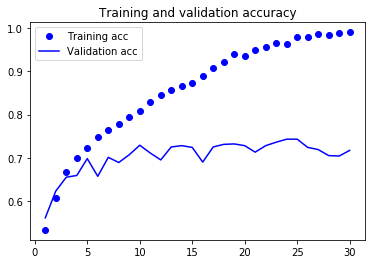

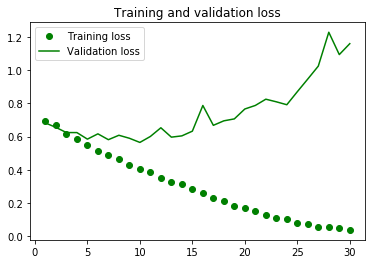

In [16]:
import matplotlib.pyplot as plt
def plot_acc_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc)+1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'go', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()
plot_acc_loss(history)

<Figure size 432x288 with 0 Axes>

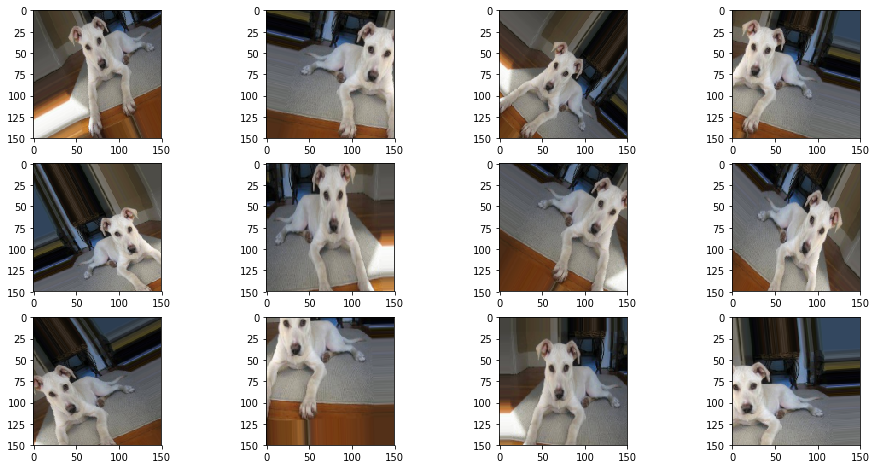

In [24]:
permute_range = 0.3
datagen = ImageDataGenerator(
rotation_range=40, width_shift_range=permute_range, height_shift_range=permute_range, shear_range=permute_range, 
    zoom_range=permute_range, horizontal_flip=True, fill_mode='nearest')
from keras.preprocessing import image
fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]
img_path = fnames[4]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)
i = 0
plt.figure(i)
plt.figure(figsize=(16,8))

for batch in datagen.flow(x, batch_size=1):
    plt.subplot(3,4,i+1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 12  == 0:
        break
plt.show()

In [18]:
print((1,)+x.shape)

(1, 1, 150, 150, 3)


In [19]:
def build_model_dropout(dropout=0.5):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
    return model
model = build_model_dropout(dropout=0.5)
print(model.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
___________________________

In [20]:
permute_range = 0.3
train_datagen =  ImageDataGenerator(
    rescale=1.0/255,
    rotation_range = 40,
    width_shift_range=permute_range,
    height_shift_range=permute_range,
    shear_range=permute_range,
    zoom_range=permute_range,
    horizontal_flip=True,
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

history = model.fit_generator(
    train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 14s 144ms/step - loss: 0.6938 - acc: 0.5234 - val_loss: 0.6794 - val_acc: 0.5133
Epoch 2/100
100/100 [==============================] - 13s 133ms/step - loss: 0.6714 - acc: 0.5641 - val_loss: 0.6568 - val_acc: 0.5979
Epoch 3/100
100/100 [==============================] - 13s 128ms/step - loss: 0.6579 - acc: 0.5997 - val_loss: 0.8282 - val_acc: 0.5190
Epoch 4/100
100/100 [==============================] - 13s 126ms/step - loss: 0.6491 - acc: 0.6128 - val_loss: 0.6853 - val_acc: 0.5683
Epoch 5/100
100/100 [==============================] - 13s 129ms/step - loss: 0.6350 - acc: 0.6331 - val_loss: 0.5974 - val_acc: 0.6593
Epoch 6/100
100/100 [==============================] - 13s 132ms/step - loss: 0.6200 - acc: 0.6506 - val_loss: 0.6009 - val_acc: 0.6630
Epoch 7/100
100/100 [==============================] - 13s 135ms/step - loss: 0.6228 - acc: 0.6525 -

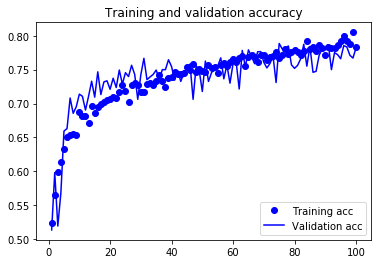

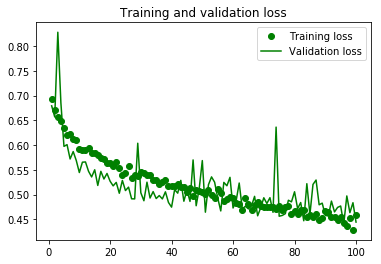

In [26]:
plot_acc_loss(history)

In [25]:
import bokeh, plotly, dash
print(bokeh.__file__)

/home/ktdiedrich/.conda/envs/py36/lib/python3.6/site-packages/bokeh/__init__.py


In [27]:
del model